## **Monte Carlo Methods**

Monte Carlo methods, at their core, are sampling-based techniques. They use repeated random sampling to estimate numerical results. The idea is that by simulating the environment many times and averaging the results, we can approximate quantities like the expected return for a state or action.

---
Why might Monte Carlo methods be more useful than dynamic programming methods (like value iteration) in situations where the environment is not fully known?

---


Dynamic programming methods, like **value iteration** and **policy iteration**, require full knowledge of the environment. They rely on having access to the transition probabilities $P(s' \mid s, a)$ and the reward function $R(s, a, s')$ to systematically compute the value of each state or action.

- In dynamic programming, the environment is assumed to be fully known, and these algorithms iteratively update the value of states or improve the policy based on the entire environment’s dynamics.



#### Monte Carlo Methods

Monte Carlo methods don’t require knowledge of the transition probabilities or reward function upfront. Instead, they learn from experience. By interacting with the environment and sampling sequences of states, actions, and rewards, Monte Carlo methods estimate the value of a state or action based purely on observed outcomes from episodes.

**Why Monte Carlo methods are useful when the environment isn’t fully known:**

- **Sample-based learning:** Monte Carlo methods learn by simulating episodes from the environment. This is particularly useful when we can’t explicitly model all the transitions or rewards. Instead, we experience them through sampling.
- **No need for a model:** Monte Carlo doesn’t require a model of the environment's dynamics (transition probabilities), unlike dynamic programming methods.
- **Flexible handling of exploration:** Monte Carlo methods allow the agent to explore the environment by interacting with it and gradually improve the estimates of state values or action values based on what it observes.


#### Mathematical Concept in Monte Carlo Methods

In Monte Carlo methods, we typically want to estimate the value of a state $V(s)$ or the value of a state-action pair $Q(s, a)$. This is done by averaging the returns (total rewards) observed after visiting that state (or taking that action) over many episodes.

For a given state $s$, the Monte Carlo estimate of its value is:

$$
V(s) \approx \frac{1}{N} \sum_{i=1}^{N} G_t(i)
$$

Where:

- $N$ is the number of episodes where state $s$ is visited.
- $G_t(i)$ is the return (the total reward accumulated from time $t$ until the end of the episode) for the $i$-th episode where state $s$ was visited.


Wait, is there are any challanges or limitations: 

1. **Need for complete episodes**: Monte Carlo methods require entire episodes to be completed, making them unsuitable for tasks without clear episode boundaries.
2. **High variance**: Since they rely on sampled episodes, the value estimates can vary significantly, requiring many episodes for accurate results.
3. **Exploration**: Insufficient exploration can result in poor value estimates for states not frequently visited.
4. **Delayed feedback**: Values are updated only at the end of an episode, slowing down learning.
5. **Inefficiency in large state spaces**: It can take a long time to visit all states often enough to get reliable value estimates in large or complex environments.



## **Monte Carlo Prediction**

### Monte Carlo (MC) Prediction in Reinforcement Learning

Monte Carlo (MC) prediction is a method used in Reinforcement Learning to estimate the value function $V(s)$ for a given policy $\pi$. The objective is to evaluate how good the policy $\pi$ is by estimating the expected return (the total cumulative reward) for each state.

Unlike dynamic programming methods, which require knowledge of the environment's dynamics (i.e., the transition probabilities and rewards), Monte Carlo methods rely on sampled episodes from the environment. The key idea is to learn by averaging the returns observed after visiting a state over multiple episodes.

---

### Major Components of MC Prediction:

- **Policy Evaluation**: The aim is to estimate $V(s)$, which is the expected return starting from state $s$ and following policy $\pi$ thereafter.
- **Returns**: The return $G_t$ is the sum of rewards from time $t$ to the end of the episode, discounted by a factor $\gamma$ (the discount factor).
- **First-Visit MC**: For each episode, we only update the value $V(s)$ for the first visit to each state in that episode. This ensures we don’t over-count the same state multiple times in a single episode.

---

### How Monte Carlo Prediction Works:

1. **Generate Episodes**: The agent interacts with the environment, following a policy $\pi$. Each episode is a sequence of state-action-reward tuples until a terminal state is reached.

2. **Compute Returns**: After an episode is completed, the agent computes the returns $G_t$ for each state. The return is the sum of rewards obtained from that state to the end of the episode.

3. **Update Value Function**: For each state, the agent updates the value function $V(s)$ by averaging the returns observed over multiple episodes where that state was visited. In first-visit MC, we update the value based on the first time the state was visited in the episode.

---

### Algorithm Explanation: First-Visit MC Prediction

1. **Input**: A policy $\pi$ to be evaluated. The agent is tasked with evaluating how good the policy $\pi$ is by estimating the value function $V(s)$.

2. **Initialization**:
   - $V(s)$: The value function for each state $s$ is initialized arbitrarily (e.g., all states could initially have a value of zero or any random number).
   - Returns(s): For each state $s$, we maintain a list to store all the returns observed when that state $s$ is visited during an episode.

3. **Loop forever (for each episode)**:
   - **Generate an episode**: The agent follows the policy $\pi$, interacting with the environment. An episode is a complete sequence of states, actions, and rewards from the start state $S_0$ to the terminal state.
   - Episode example: 
     $$
     S_0, A_0, R_1, S_1, A_1, R_2, \dots, S_{T-1}, A_{T-1}, R_T
     $$

4. **Return Calculation**: Initialize the return $G \leftarrow 0$. This will be used to calculate the cumulative reward.

5. **Loop for each step of the episode (backwards)**:
   - For each time step $t$, compute the return $G$ by updating it with the discounted future rewards:
     $$
     G \leftarrow \gamma G + R_{t+1}
     $$

6. **First-Visit Condition**:
   - For each time step $t$, check if the state $S_t$ has appeared earlier in the episode. If it has not appeared earlier (i.e., it's the first visit), proceed with the following updates:
     - Append $G$ to Returns($S_t$): Add the return $G$ to the list of returns associated with state $S_t$.
     - Update $V(S_t)$: Update the value of state $S_t$ to be the average of all returns observed for $S_t$:
       $$
       V(S_t) \leftarrow \text{average of all returns for } S_t
       $$

---

### Key Points:

1. **First-Visit MC**: The algorithm only updates the value function for a state on the first visit to that state in the episode. This ensures that each state is only updated once per episode, preventing over-counting.

2. **Return Calculation**: The return $G$ is the sum of future rewards, discounted by $\gamma$.

3. **Value Function Update**: The value function $V(s)$ is updated as the average of the observed returns for that state across all episodes.

---

#### Why "First-Visit"?

The reason we only update the value function on the first visit to a state is to avoid biasing the value estimates. If a state is visited multiple times in a single episode, it’s possible that later visits are influenced by actions taken earlier in the episode. By focusing only on the first visit, we get a cleaner estimate of the value of that state.

#### Visual Intuition:

Let’s consider a grid-world example. If the agent visits a state like $(1,1)$ multiple times in one episode, **First-Visit MC** will only update $V(1,1)$ based on the first time it was encountered. In contrast, **Every-Visit MC** would update $V(1,1)$ every time it was visited in that episode.

If the second visit is due to some bad decisions (like going in circles), First-Visit MC prevents those poor decisions from polluting the value estimate for $(1,1)$, which could cause overestimation.



#### Example of Bias Reduction:

Imagine an agent starts at $(0,0)$, visits state $(1,1)$, and then mistakenly loops back to $(1,1)$ again. If the agent updated the value of $(1,1)$ both times it visited, it might overestimate the value of $(1,1)$ since it is counting the reward information multiple times in one episode.

With **First-Visit MC**, the value update is based solely on the first time the agent visited $(1,1)$, avoiding the overestimation that might occur if the state is visited repeatedly.

---

- **First-Visit MC** reduces bias by only updating the value of a state when it’s visited the first time in an episode, preventing multiple visits within the same episode from distorting the state’s value estimate.
- **Every-Visit MC** updates the value of a state every time it is visited in an episode, which can be useful in environments without looping or revisits.



---

### Example Application:

Imagine an agent navigating a grid-world where:

- States represent grid cells.
- Actions are moves (up, down, left, right).
- The agent follows a policy $\pi$ and completes episodes by reaching the goal.

After each episode, the agent computes the returns for all states visited in that episode and updates their value estimates based on the first visit to each state. Over time, with many episodes, the value function $V(s)$ for each state will converge to the true expected return starting from that state.

---


Monte Carlo prediction is a powerful method to estimate state values based on sampled experience from the environment. The first-visit version of the algorithm ensures that the value function is updated based on clean, unbiased estimates from the first time a state is visited in each episode. Over time, these estimates converge to the true value of each state under the given policy $\pi$.


In [1]:
import numpy as np 
import random
from typing import Tuple

class GridWorldEnv:
    def __init__(self, grid_size: Tuple = (4,4), goal_state: Tuple = (3,3)):
        self.grid_size = grid_size
        self.goal_state = goal_state
        self.actions = ["up", "down", "left", "right"]
        
        self.reset()        
        
    def reset(self):
        """Reset the environment and return the starting state."""
        self.state = (0,0)
        return self.state
    
    def step(self, action):
        """Take a step in the environment."""
        row, col = self.state
        
        if action == "up": next_state = (max(row - 1, 0), col)
        elif action == "down": next_state = (min(row + 1, self.grid_size[0] -1), col)
        elif action == "left": next_state = (row, max(col - 1, 0))
        elif action == "right": next_state = (row, min(col + 1, self.grid_size[1] - 1))
        else: raise ValueError(f"Unknown action: {action}") 
        
        self.state = next_state
        # rewards: +1 for goal, -0.1 for each step 
        if self.state == self.goal_state:
            reward = 1 
            done = True
        else:
            reward = -0.1
            done = False
        
        return next_state, reward, done
    
    def sample_action(self):
        """Randomly sample an action"""
        return random.choice(self.actions)
    
    

In [2]:
from collections import defaultdict
from utils import *

# monte carlo prediction with first-visit
def first_visit_monte_carlo_prediction(env: GridWorldEnv, episodes: int = 1000, gamma: float = 0.9):
    # initialize value function and return list
    # value function for each state 
    V = defaultdict(float)
    # track all returns for each state 
    returns = defaultdict(list)
    
    for ep in range(episodes):
        # generate episode
        episode = []
        state = env.reset()
        
        # run until destination reached for this episodes
        # sample action (randomly), use step function to get next step, reward, and if its done.
        while True:
            action = env.sample_action()
            next_state, reward, done = env.step(action)
            episode.append((state, reward))
            state = next_state
            if done: break
            
        # now we have rewards from starting state s to goal state
        # initialize the return 
        G = 0
        visited_states = set()
        
        # loop thorough the episodes in reverse oreder 
        for t in range(len(episode)-1, -1, -1):
            state, reward = episode[t]
            G = reward + gamma * G
            
            # First-visit: check if state has been visited earlier in this episodes 
            if state not in visited_states:
                visited_states.add(state)
                # store the return for the state 
                returns[state].append(G)
                # update value estimate as average of returns 
                V[state] = np.mean(returns[state])
                
    return V     

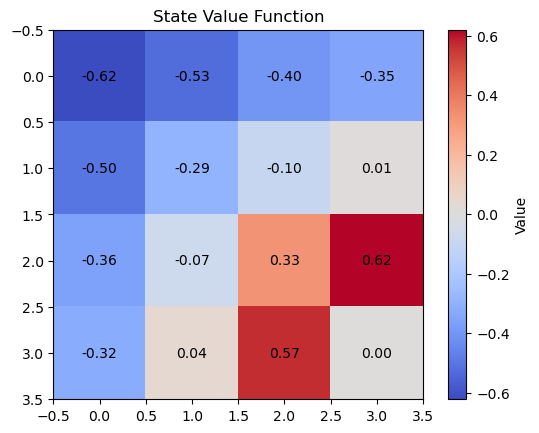

In [4]:
env = GridWorldEnv()

v = first_visit_monte_carlo_prediction(env)
plot_statewise_value_function(v)